# Assignment: Image Processing (30 September 2025)

## 📖 Brief Theory (Summary)

- A **kernel** is a small matrix used to calculate new pixel values based on their neighbors.  
- The **kernel size** determines how many neighboring pixels are considered:  
  - **Small kernel** → Preserves more details.  
  - **Large kernel** → Produces smoother images but loses fine details.  

---

## 🧪 Practice (Simple Experiment)

We will:  
1. Use a grayscale image (face, landscape, or text).  
2. Apply a **Mean Filter** with kernel sizes: **3×3, 5×5, 7×7**.  
3. Apply an **Unsharp Filter** (edge detection sharpening) with kernel sizes: **3×3, 5×5, 7×7**.  
4. Compare results with the original image.  


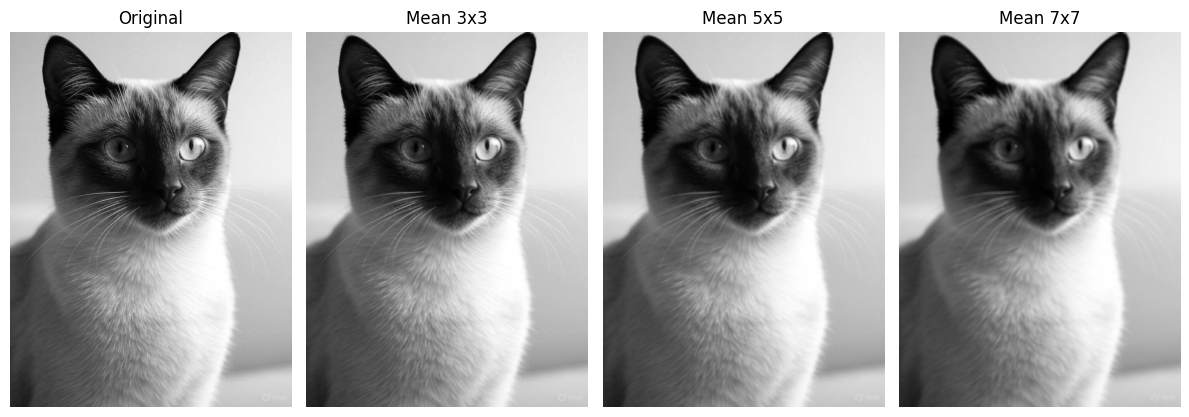

In [5]:
# Import libraries
import cv2
import matplotlib.pyplot as plt

# Load grayscale image
image_gray = cv2.imread("../assets/Image.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply Mean Filter with different kernel sizes
mean_3 = cv2.blur(image_gray, (3,3))
mean_5 = cv2.blur(image_gray, (5,5))
mean_7 = cv2.blur(image_gray, (7,7))

# Display results
plt.figure(figsize=(12,8))
titles = ["Original", "Mean 3x3", "Mean 5x5", "Mean 7x7"]
images = [image_gray, mean_3, mean_5, mean_7]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


## 🔍 Observation (Mean Filter)

- **3×3 kernel**: Slight smoothing, details remain visible.  
- **5×5 kernel**: More smoothing, fine details start to blur.  
- **7×7 kernel**: Strong smoothing, noticeable loss of sharpness and detail.  


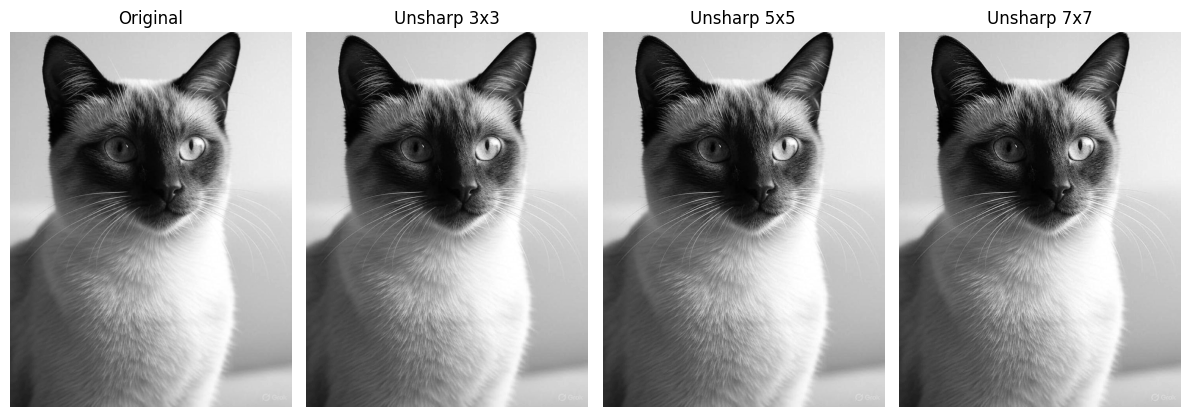

In [4]:
# Unsharp Filter (Edge enhancement)
import numpy as np

# Define function for unsharp masking
def unsharp_filter(image, ksize):
    blurred = cv2.GaussianBlur(image, (ksize, ksize), 0)
    unsharp = cv2.addWeighted(image, 1.5, blurred, -0.5, 0)
    return unsharp

# Apply with different kernel sizes
unsharp_3 = unsharp_filter(image_gray, 3)
unsharp_5 = unsharp_filter(image_gray, 5)
unsharp_7 = unsharp_filter(image_gray, 7)

# Display results
plt.figure(figsize=(12,8))
titles = ["Original", "Unsharp 3x3", "Unsharp 5x5", "Unsharp 7x7"]
images = [image_gray, unsharp_3, unsharp_5, unsharp_7]

for i in range(4):
    plt.subplot(1,4,i+1)
    plt.imshow(images[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


## 🔍 Observation (Unsharp Filter)

- **3×3 kernel**: Edges enhanced, details are sharp.  
- **5×5 kernel**: Moderate sharpening, some noise may appear.  
- **7×7 kernel**: Stronger edge enhancement, but small details may look artificial.  


# 📊 Analysis Guide  

1. **What happens to the image details when the kernel size increases?**  
   - As the kernel size increases, details become more blurred in mean filtering.  
   - In unsharp filtering, edges are enhanced more strongly with larger kernels, but fine details may distort.  

2. **Why are edges clearer with a small kernel than a large one?**  
   - Small kernels focus on closer neighbors, preserving fine details.  
   - Large kernels average over more pixels, causing edges to fade.  

3. **How does the kernel size affect noise in the image?**  
   - Larger kernels reduce noise better but also remove fine textures.  
   - Small kernels reduce less noise but keep more detail.  

4. **If your goal is to reduce noise but still preserve edges, which kernel size should you choose?**  
   - A medium kernel (like **5×5**) balances noise reduction and detail preservation.  

---

# 📌 Conclusion  

- There is a **trade-off between smoothing and detail preservation**.  
- **Small kernels** → preserve details and edges but less effective at noise reduction.  
- **Large kernels** → reduce noise better but blur edges and fine details.  
- The **optimal kernel size depends on the task**:  
  - For **denoising** → use larger kernels.  
  - For **edge clarity** → use smaller kernels.  
